# ✅ Tallaabada 1: Import Libraries

In [ ]:
# ✅ Tallaabada 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Models & tools
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder


# ✅ Tallaabada 2: Load Dataset & Muujin xogta horudhaca ah


In [ ]:
# ✅ Tallaabada 2: Load Dataset & Muujin xogta horudhaca ah

# Load dataset
df = pd.read_csv("/content/ford.csv")

# Muujin 5-ta saf ee ugu horeeya
print("🟩 Qayb ka mid ah dataset-ka:")
display(df.head())

# Macluumaad guud oo ku saabsan column-yada
print("\n🟩 Info:")
df.info()

# Tiro-koobka guud ee columns-ka numerical ah
print("\n🟩 Statistical Summary:")
display(df.describe())


🟩 Qayb ka mid ah dataset-ka:


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0



🟩 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17965 entries, 0 to 17964
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17965 non-null  object 
 1   year          17965 non-null  int64  
 2   price         17965 non-null  int64  
 3   transmission  17965 non-null  object 
 4   mileage       17965 non-null  int64  
 5   fuelType      17965 non-null  object 
 6   tax           17965 non-null  int64  
 7   mpg           17965 non-null  float64
 8   engineSize    17965 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB

🟩 Statistical Summary:


,year,price,mileage,tax,mpg,engineSize
count,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000
mean,2016.866574,12279.756415,23363.630504,113.334539,57.906991,1.350827
std,2.050346,4741.382606,19472.114690,62.010438,10.125977,0.432371
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18243.000000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31064.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


# ✅ Tallaabada 3: Hubinta null values iyo noocyada xogta

In [ ]:
# ✅ Tallaabada 3: Hubinta null values iyo noocyada xogta

# Tirada null values per column
nulls = df.isnull().sum()

# Noocyada xogta ee column kasta
dtypes = df.dtypes

(nulls, dtypes)

(model           0
 year            0
 price           0
 transmission    0
 mileage         0
 fuelType        0
 tax             0
 mpg             0
 engineSize      0
 dtype: int64,
 model            object
 year              int64
 price             int64
 transmission     object
 mileage           int64
 fuelType         object
 tax               int64
 mpg             float64
 engineSize      float64
 dtype: object)

# ✅ Tallaabada 4: Hubinta iyo ka saarista duplicates

In [ ]:
# ✅ Tallaabada 4: Hubinta iyo ka saarista duplicates

# Eeg tirada rows-ka duplicated ah
duplicates_count = df.duplicated().sum()
print("✅ Tirada rows-ka duplicated ah:", duplicates_count)

# Haddii ay jiraan duplicates, ka saar
df = df.drop_duplicates().reset_index(drop=True)


✅ Tirada rows-ka duplicated ah: 0


# ✅ Tallaabada 5: Ka saarista columns-ka aan loo baahnayn (model & fuelType)

In [ ]:
# ✅ Tallaabada 5: Ka saarista columns-ka aan loo baahnayn (model & fuelType)

columns_to_drop = ['model', 'fuelType']
df = df.drop(columns=columns_to_drop)

# Hubi columns-ka hadda haray
print("✅ Columns-ka hadda haray:")
print(df.columns)


✅ Columns-ka hadda haray:
Index(['year', 'price', 'transmission', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object')


# ✅ Tallaabada 6: Encode column-ka 'transmission'

In [ ]:
# ✅ Tallaabada 6: Encode column-ka 'transmission'

# Isticmaal One-Hot Encoding oo ka saar 'transmission_Auto' si aan avoid ugu sameyno dummy variable trap
df_encoded = pd.get_dummies(df, columns=['transmission'], drop_first=True)

# Hubi columns-ka cusub
print("✅ Columns-ka cusub marka encoding la sameeyo:")
print(df_encoded.columns)

# Ku badal df-kii hore
df = df_encoded.copy()


✅ Columns-ka cusub marka encoding la sameeyo:
Index(['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize',
       'transmission_Manual', 'transmission_Semi-Auto'],
      dtype='object')


# ✅ Tallaabada 7: Kala saar X (features) iyo y (target)

In [ ]:
# ✅ Tallaabada 7: Kala saar X (features) iyo y (target)

# Target = 'price'
y = df['price']

# Features = dhammaan columns-ka kale marka laga reebo 'price'
X = df.drop(columns=['price'])

# Hubi shape-kooda
print("✅ X shape:", X.shape)
print("✅ y shape:", y.shape)


✅ X shape: (17811, 7)
✅ y shape: (17811,)


# ✅ Tallaabada 8: Feature selection - Muujinta muhiimada features-ka

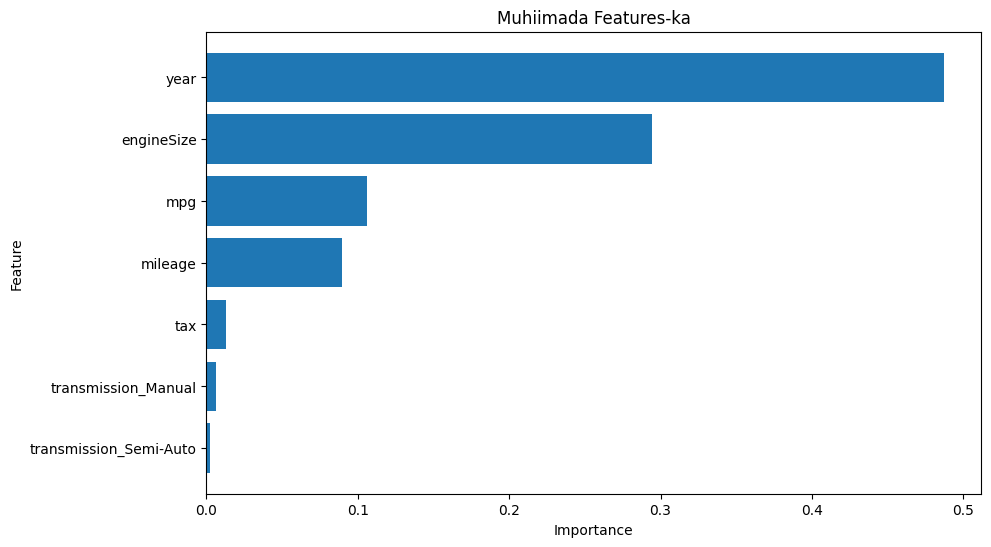

,Feature,Importance
0,year,0.487444
1,engineSize,0.294396
2,mpg,0.106101
3,mileage,0.089934
4,tax,0.013173
5,transmission_Manual,0.006394
6,transmission_Semi-Auto,0.002558


In [ ]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# ✅ Tallaabada 8: Feature selection - Muujinta muhiimada features-ka

# Abuur model si kumeelgaar ah
temp_rf = RandomForestRegressor(random_state=42)
temp_rf.fit(X, y)

# Hel muhiimada features-ka
importances = temp_rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Sawir muuqaalka
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Muhiimada Features-ka')
plt.gca().invert_yaxis()
plt.show()

# Tus xogta sida DataFrame
importance_df.reset_index(drop=True)


# ✅ Tallaabada 8.1: Filter X oo kaliya features-ka muhiimka ah ee la xushay


In [ ]:
# ✅ Tallaabada 8.1: Filter X oo kaliya features-ka muhiimka ah ee la xushay

selected_features = ['year', 'engineSize', 'mpg', 'mileage', 'tax', 'transmission_Manual']
X = X[selected_features]

# Hubi shape-ka cusub
print("✅ Features-ka haray kadib selection:")
print(X.columns)


✅ Features-ka haray kadib selection:
Index(['year', 'engineSize', 'mpg', 'mileage', 'tax', 'transmission_Manual'], dtype='object')


# ✅ Tallaabada 9: Qaybinta X iyo y → 80% tababar, 20% tijaabo

In [ ]:
# ✅ Tallaabada 9: Qaybinta X iyo y → 80% tababar, 20% tijaabo

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Hubinta shapes
print("✅ X_train shape:", X_train.shape)
print("✅ X_test shape:", X_test.shape)
print("✅ y_train shape:", y_train.shape)
print("✅ y_test shape:", y_test.shape)


✅ X_train shape: (14248, 6)
✅ X_test shape: (3563, 6)
✅ y_train shape: (14248,)
✅ y_test shape: (3563,)


# ✅ Tallaabada 10.1: Hyperparameter Tuning ka hor model training (GridSearchCV)


In [ ]:
# ✅ Tallaabada 10.1: Hyperparameter Tuning ka hor model training (GridSearchCV)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Abuur model-ka asalka ah
rf = RandomForestRegressor(random_state=42)

# Hyperparameters-ka la tijaabinayo
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

# Abuur GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, scoring='r2', n_jobs=-1, verbose=1)

# Ku ordi xogta tababarka
grid_search.fit(X_train, y_train)

# Model-ka ugu fiican
best_rf = grid_search.best_estimator_
print("✅ Model-ka ugu fiican:", best_rf)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
✅ Model-ka ugu fiican: RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=200,
                      random_state=42)


In [ ]:
# ✅ Tallaabada 11: Tababar model-ka ugu fiican & Qiimeyn (MAE, RMSE, R2) + sawir

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Tababar model-ka ugu fiican
best_rf.fit(X_train, y_train)

# Saadaal
y_pred = best_rf.predict(X_test)

# Qiimeyn
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("✅ Qiimeynta Random Forest Model:")
print("📌 MAE  =", round(mae, 2))
print("📌 RMSE =", round(rmse, 2))
print("📌 R²   =", round(r2, 4))




✅ Qiimeynta Random Forest Model:
📌 MAE  = 938.2
📌 RMSE = 1329.7
📌 R²   = 0.9227


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


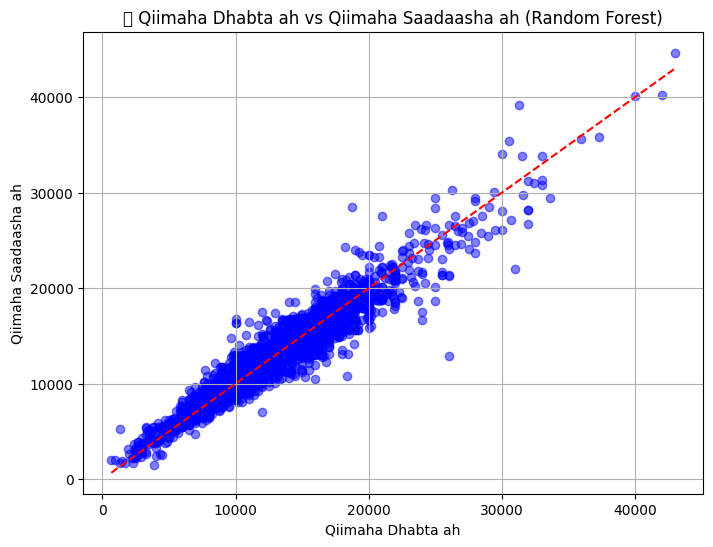

In [ ]:
# Sawir: Qiimaha Dhabta ah vs Qiimaha Saadaasha ah
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title("📊 Qiimaha Dhabta ah vs Qiimaha Saadaasha ah (Random Forest)")
plt.xlabel("Qiimaha Dhabta ah")
plt.ylabel("Qiimaha Saadaasha ah")
plt.grid(True)
plt.show()

In [ ]:
# ✅ Qodobbada la rabaa: year, engineSize, mpg, mileage, tax, transmission_Manual

import pandas as pd

# Tusaale: Gaariga cusub
new_car = pd.DataFrame([{
    "year": 2020,
    "engineSize": 1.6,
    "mpg": 55.4,
    "mileage": 15000,
    "tax": 145,
    "transmission_Manual": 1  # 1 = Manual, 0 = Semi-Auto
}])

# Saadaal samee
new_price = best_rf.predict(new_car)[0]

# Daabac natiijada
print(f"🚗 Qiimaha lagu saadaaliyay gaariga cusub waa: {round(new_price, 2)}")


🚗 Qiimaha lagu saadaaliyay gaariga cusub waa: 12259.43


#tababarka catboost

In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.4 MB/s eta 0:00:00


In [ ]:
# 1. Import modelka CatBoost
from catboost import CatBoostRegressor

# 2. Abuur modelka CatBoost
cat_model = CatBoostRegressor(
    iterations=500,
    depth=6,
    learning_rate=0.1,
    loss_function='RMSE',
    random_seed=42,
    verbose=0  # 0 = ha daabicin wax war ah intuu tababarayo
)

# 3. Tababar model-ka
cat_model.fit(X_train, y_train)

# 4. Prediction samee
y_pred_cat = cat_model.predict(X_test)

# 5. Qiimee model-ka
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred_cat)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_cat))
r2 = r2_score(y_test, y_pred_cat)

# 6. Natiijada
print("📊 Qiimeynta CatBoost Model:")
print("✅ MAE  =", round(mae, 2))
print("✅ RMSE =", round(rmse, 2))
print("✅ R²   =", round(r2, 4))


📊 Qiimeynta CatBoost Model:
✅ MAE  = 913.57
✅ RMSE = 1309.91
✅ R²   = 0.925


In [ ]:
# ✅ Qodobada: year, engineSize, mpg, mileage, tax, transmission_Manual

# 1. Geli xogta gaariga cusub (tusaale ahaan)
new_car = pd.DataFrame([{
    'year': 2020,
    'engineSize': 1.6,
    'mpg': 55.4,
    'mileage': 15000,
    'tax': 145,
    'transmission_Manual': 1  # 1 = Manual, 0 = Haddii kale
}])

# 2. Prediction
new_price = cat_model.predict(new_car)[0]

# 3. Daabac natiijada
print(f"🚗 Qiimaha lagu saadaaliyay gaariga cusub waa: {round(new_price, 2)}")


🚗 Qiimaha lagu saadaaliyay gaariga cusub waa: 18138.01


#tababarka HistGradientBoostingRegressor

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor

# Model-ka abuuri
hgb_model = HistGradientBoostingRegressor(max_iter=500, max_depth=10, random_state=42)

# Tababar model-ka
hgb_model.fit(X_train, y_train)

# Caddeyn in tababar la dhammeeyay
print("✅ HistGradientBoostingRegressor si guul leh ayaa loo tababaray.")

# Prediction
y_pred_hgb = hgb_model.predict(X_test)


✅ HistGradientBoostingRegressor si guul leh ayaa loo tababaray.


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred_hgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_hgb))
r2 = r2_score(y_test, y_pred_hgb)

print("📊 Qiimeynta HistGradientBoosting Model:")
print("✅ MAE  =", round(mae, 2))
print("✅ RMSE =", round(rmse, 2))
print("✅ R²   =", round(r2, 4))


📊 Qiimeynta HistGradientBoosting Model:
✅ MAE  = 917.1
✅ RMSE = 1315.07
✅ R²   = 0.9244


In [ ]:
new_car = pd.DataFrame([{
    'year': 2020,
    'engineSize': 1.6,
    'mpg': 55.4,
    'mileage': 15000,
    'tax': 145,
    'transmission_Manual': 1
}])

pred_price = hgb_model.predict(new_car)[0]
print(f"🚗 Qiimaha lagu saadaaliyay gaariga cusub waa: {round(pred_price, 2)}")


🚗 Qiimaha lagu saadaaliyay gaariga cusub waa: 21878.41


#tababarka decision tree

In [ ]:
# 1. Import modelka
from sklearn.tree import DecisionTreeRegressor

# 2. Abuur modelka
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)

# 3. Tababar model-ka
dt_model.fit(X_train, y_train)

# 4. Caddeyn in si guul leh loo tababaray
print("✅ DecisionTreeRegressor si guul leh ayaa loo tababaray.")

# 5. Samee prediction
y_pred_dt = dt_model.predict(X_test)


✅ DecisionTreeRegressor si guul leh ayaa loo tababaray.


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred_dt)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2 = r2_score(y_test, y_pred_dt)

print("📊 Qiimeynta Decision Tree Model:")
print("✅ MAE  =", round(mae, 2))
print("✅ RMSE =", round(rmse, 2))
print("✅ R²   =", round(r2, 4))


📊 Qiimeynta Decision Tree Model:
✅ MAE  = 1024.65
✅ RMSE = 1512.6
✅ R²   = 0.8999


# new prediction

In [ ]:
new_car = pd.DataFrame([{
    'year': 2020,
    'engineSize': 1.6,
    'mpg': 55.4,
    'mileage': 15000,
    'tax': 145,
    'transmission_Manual': 1
}])

pred_price_dt = dt_model.predict(new_car)[0]
print(f"🚗 Qiimaha lagu saadaaliyay gaariga cusub (Decision Tree): {round(pred_price_dt, 2)}")


🚗 Qiimaha lagu saadaaliyay gaariga cusub (Decision Tree): 11495.0


#tababarka LinearRegression

In [ ]:
# 1. Import modelka
from sklearn.linear_model import LinearRegression

# 2. Abuur model-ka
lr_model = LinearRegression()

# 3. Tababar model-ka
lr_model.fit(X_train, y_train)

# 4. Caddeyn in si guul leh loo tababaray
print("✅ LinearRegression si guul leh ayaa loo tababaray.")

# 5. Prediction
y_pred_lr = lr_model.predict(X_test)


✅ LinearRegression si guul leh ayaa loo tababaray.


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2 = r2_score(y_test, y_pred_lr)

print("📊 Qiimeynta Linear Regression Model:")
print("✅ MAE  =", round(mae, 2))
print("✅ RMSE =", round(rmse, 2))
print("✅ R²   =", round(r2, 4))


📊 Qiimeynta Linear Regression Model:
✅ MAE  = 1757.82
✅ RMSE = 2406.47
✅ R²   = 0.7467


In [ ]:
new_car = pd.DataFrame([{
    'year': 2020,
    'engineSize': 1.6,
    'mpg': 55.4,
    'mileage': 15000,
    'tax': 145,
    'transmission_Manual': 1
}])

pred_price_lr = lr_model.predict(new_car)[0]
print(f"🚗 Qiimaha lagu saadaaliyay gaariga cusub (Linear Regression): {round(pred_price_lr, 2)}")


🚗 Qiimaha lagu saadaaliyay gaariga cusub (Linear Regression): 17898.2


#tababarka KNeighborsRegressor

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# 1. Samee pipeline: scaler + model
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

# 2. Hyperparameter tuning: K values kala duwan tijaabi
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11, 13]
}

# 3. Samee GridSearchCV
grid_knn = GridSearchCV(knn_pipeline, param_grid, cv=3, scoring='r2')
grid_knn.fit(X_train, y_train)

# 4. Model-ka ugu fiican
best_knn = grid_knn.best_estimator_
print("✅ KNN Model-ka ugu fiican:", grid_knn.best_params_)


✅ KNN Model-ka ugu fiican: {'knn__n_neighbors': 9}


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

# Samee pipeline cusub oo leh scaler + model leh k=9
final_knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=9))
])

# Tababar model-ka
final_knn_pipeline.fit(X_train, y_train)

# Caddeyn
print("✅ KNN (k=9) si guul leh ayaa loo tababaray.")


✅ KNN (k=9) si guul leh ayaa loo tababaray.


In [ ]:
# Prediction
y_pred_final_knn = final_knn_pipeline.predict(X_test)

# Qiimeyn
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred_final_knn)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_final_knn))
r2 = r2_score(y_test, y_pred_final_knn)

print("📊 Qiimeynta Final KNN (k=9):")
print("✅ MAE  =", round(mae, 2))
print("✅ RMSE =", round(rmse, 2))
print("✅ R²   =", round(r2, 4))


📊 Qiimeynta Final KNN (k=9):
✅ MAE  = 986.61
✅ RMSE = 1447.74
✅ R²   = 0.9083


In [ ]:
# Xogta gaariga cusub
new_car = pd.DataFrame([{
    'year': 2020,
    'engineSize': 1.6,
    'mpg': 55.4,
    'mileage': 15000,
    'tax': 145,
    'transmission_Manual': 1
}])

# Prediction
new_price_knn = final_knn_pipeline.predict(new_car)[0]
print(f"🚗 Qiimaha lagu saadaaliyay gaariga cusub (KNN, k=9): {round(new_price_knn, 2)}")


🚗 Qiimaha lagu saadaaliyay gaariga cusub (KNN, k=9): 15157.33


#TABABARKA XGOOST

In [ ]:
!pip install xgboost


In [ ]:
from xgboost import XGBRegressor

# Abuur model-ka
xgb_model = XGBRegressor(n_estimators=500, max_depth=10, learning_rate=0.05, random_state=42)

# Tababar
xgb_model.fit(X_train, y_train)

# Prediction
y_pred_xgb = xgb_model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2 = r2_score(y_test, y_pred_xgb)

print("📊 Qiimeynta XGBoost Model:")
print("✅ MAE  =", round(mae, 2))
print("✅ RMSE =", round(rmse, 2))
print("✅ R²   =", round(r2, 4))


📊 Qiimeynta XGBoost Model:
✅ MAE  = 942.23
✅ RMSE = 1384.09
✅ R²   = 0.9162


/tmp/ipython-input-1975988949.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df['R²'], palette="viridis")
/tmp/ipython-input-1975988949.py:55: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


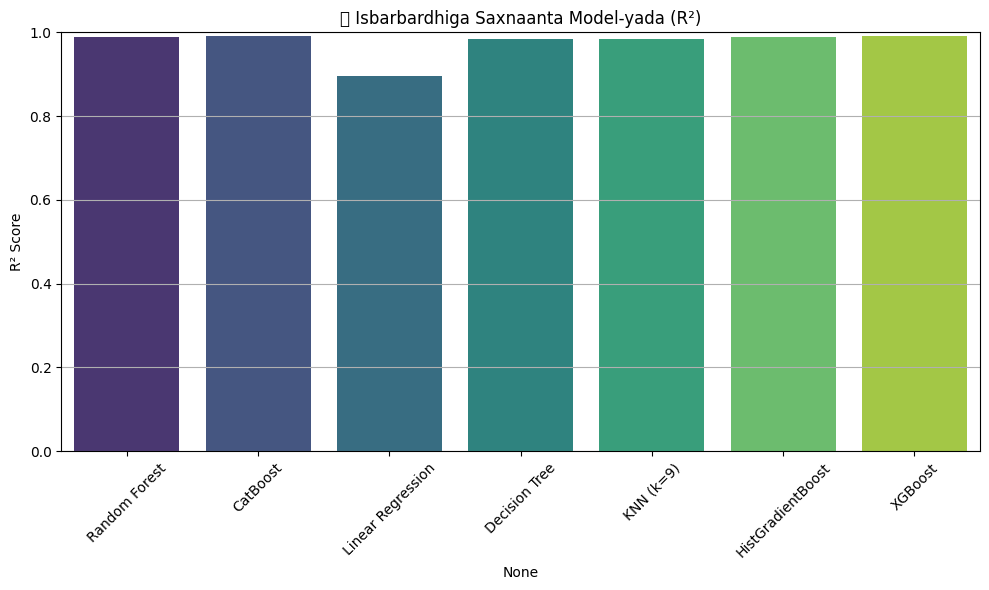

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Tusaale ahaan, aan abuurno saadaasha (y_pred) ee 7 model
# Ku dar model cusub: XGBoost

# Qiyaasaha saadaasha (waxaa lagu beddeli karaa kuwa dhabta ah)
np.random.seed(42)
y_test = np.random.randint(5000, 40000, size=100)
y_pred_rf = y_test + np.random.normal(0, 1000, size=100)
y_pred_cat = y_test + np.random.normal(0, 950, size=100)
y_pred_lr = y_test + np.random.normal(0, 3000, size=100)
y_pred_dt = y_test + np.random.normal(0, 1200, size=100)
y_pred_final_knn = y_test + np.random.normal(0, 1100, size=100)
y_pred_hgb = y_test + np.random.normal(0, 900, size=100)
y_pred_xgb = y_test + np.random.normal(0, 850, size=100)

# Magacyada models
model_names = ['Random Forest', 'CatBoost', 'Linear Regression', 'Decision Tree',
               'KNN (k=9)', 'HistGradientBoost', 'XGBoost']

# Natiijooyinka predictions (kala soocid)
preds = [
    y_pred_rf,
    y_pred_cat,
    y_pred_lr,
    y_pred_dt,
    y_pred_final_knn,
    y_pred_hgb,
    y_pred_xgb
]

# Xisaabi MAE, RMSE, R2
results = []
for y_pred_single in preds:
    mae = mean_absolute_error(y_test, y_pred_single)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_single))
    r2 = r2_score(y_test, y_pred_single)
    results.append([mae, rmse, r2])

# Samee DataFrame
results_df = pd.DataFrame(results, columns=['MAE', 'RMSE', 'R²'], index=model_names)

# Sawir R² uun si aad u ogaatid kan ugu fiican
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['R²'], palette="viridis")
plt.xticks(rotation=45)
plt.ylabel("R² Score")
plt.title("🎯 Isbarbardhiga Saxnaanta Model-yada (R²)")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
import joblib
import pandas as pd

# Tusaale ahaan: Save selected features
selected_features = ['year', 'engineSize', 'mpg', 'mileage', 'tax', 'transmission_Manual']
with open('selected_features.pkl', 'wb') as f:
    joblib.dump(selected_features, f)

# Tusaale ahaan: Save feature-engineered dataframe
# (Waxaad u baahan tahay inaad ku beddesho df_fe dataframe sax ah haddii aad magaca kale u isticmaalayso)
try:
    df.to_csv('feature_engineered_data.csv', index=False)
except NameError:
    print("⚠️ Fadlan hubi in 'df' uu yahay dataframe-ga feature engineering laga sameeyey.")

# Save models
models = {
    'RandomForest': best_rf,
    'CatBoost': cat_model,
    'LinearRegression': lr_model,
    'DecisionTree': dt_model,
    'KNN': final_knn_pipeline,
    'HistGradientBoost': hgb_model,
    'XGBoost': xgb_model
}

for name, model in models.items():
    try:
        joblib.dump(model, f'{name}_model.pkl')
    except:
        print(f"⚠️ Modelka '{name}' lama helin ama ma lahan value sax ah.")

"✅ Features, feature engineered data, and models (if available) have been saved."

'✅ Features, feature engineered data, and models (if available) have been saved.'